<a href="https://colab.research.google.com/github/dm-sap/dm-sap/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np    
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import math
from google.colab import drive
import random
from matplotlib.pyplot import figure
drive.mount('/content/drive')

Mounted at /content/drive


# **Primo Punto:**

## **Metodo VALORI MEDI:**

In [4]:
def f(x): 
  return np.e**(-x**2 / 2)

In [5]:
PUNTI = 10000
a = -5
b =  5
steps = 0
steps2 = 0
for i in range(0,PUNTI):
  x = np.random.uniform(a,b)
  steps += f(x)
  steps2 += f(x)*f(x)

area = (b-a)/PUNTI * steps
print(area)

2.5188361031446456


## **Metodo HIT or MISS :**

PUNTI=10000 punti=3041 area=2.457 +/- 0.037
Area teorica: 2.507


Text(0.5, 1.0, 'Integrazione numerica')

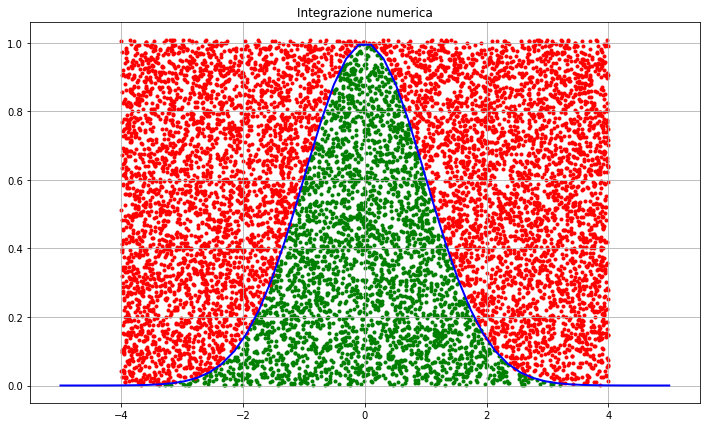

In [6]:
PUNTI=10000
a=-4
b=4
fmax=1.01
AREA=(b-a)*fmax
punti=0
 
xp=[] # ASCISSE CASUALI
yp=[] # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[] # ASCISSE CASUALI
yP=[] # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
  x=random.uniform(a,b)
  y=random.uniform(0,fmax)
  if y <= f(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y) 
  else:
    xP.append(x) # punto sopra
    yP.append(y)
area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))
pi=(2*np.pi)**0.5
print("Area teorica: %.3f" %(pi))
X=np.linspace(a-1,b+1)
yf=[]
for x in X:
    yf.append(f(x))

figure(figsize=(12,7)) 
plt.grid()
plt.plot(X , yf, color="blue" , linewidth="2") # Funzione
plt.scatter(xp, yp, color="green", marker ="."  ) # Sotto...
plt.scatter(xP, yP, color="red"  , marker ="."  ) # Sopra...
plt.title("Integrazione numerica")

# **Seconda Parte:**

In [7]:
def f1(E):
  x=0
  if 0.1<E and E<0.9 :
    x=1/E
  return x

def f2(E,mu,sigma):
  var=sigma**2
  return (1/(2*np.pi*var)**0.5)*np.e**(-(E-mu)**2/(2*var))

def F(E):
  a1=1
  a2=1.5
  return a1*f1(E)+a2*f2(E,1,0.01)

PUNTI=10000 punti=2434 area=3.627 +/- 0.064


Text(0.5, 1.0, 'Integrazione numerica')

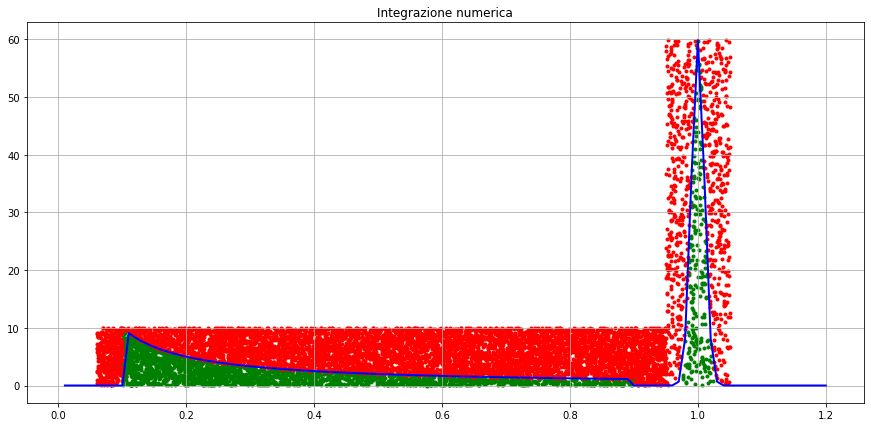

In [8]:
PUNTI=10000
a=0.06
a_1=0.95
b_1=1.05
b=1.1
fmax_1=10
fmax= 60
AREA=(a_1-a)*fmax_1+(b_1-a_1)*fmax
punti=0
 
xp=[] # ASCISSE CASUALI
yp=[] # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[] # ASCISSE CASUALI
yP=[] # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
  x=random.uniform(a,b_1)
  if x< a_1 :
    y=random.uniform(0,fmax_1)
    if y <= F(x):
      punti=punti+1
      xp.append(x) # punto sotto
      yp.append(y) 
    else:
      xP.append(x) # punto sopra
      yP.append(y)
  else:
    y=random.uniform(0,fmax)
    if y <= F(x):
      punti=punti+1
      xp.append(x) # punto sotto
      yp.append(y) 
    else:
      xP.append(x) # punto sopra
      yP.append(y)    
area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))

E=np.arange(0.01,1.21,0.01)
G=np.vectorize(F)
y=G(E)

figure(figsize=(15,7)) 
plt.grid()
plt.plot(E , y, color="blue" , linewidth="2") # Funzione
plt.scatter(xp, yp, color="green", marker ="."  ) # Sotto...
plt.scatter(xP, yP, color="red"  , marker ="."  ) # Sopra...
plt.title("Integrazione numerica")

#**Terza Parte**

In [9]:
def cross_section(theta):
  return 2*np.pi*(1+np.cos(theta)**2)*np.sin(theta) 

PUNTI=10000 punti=7695 area=16.680 +/- 0.091
80


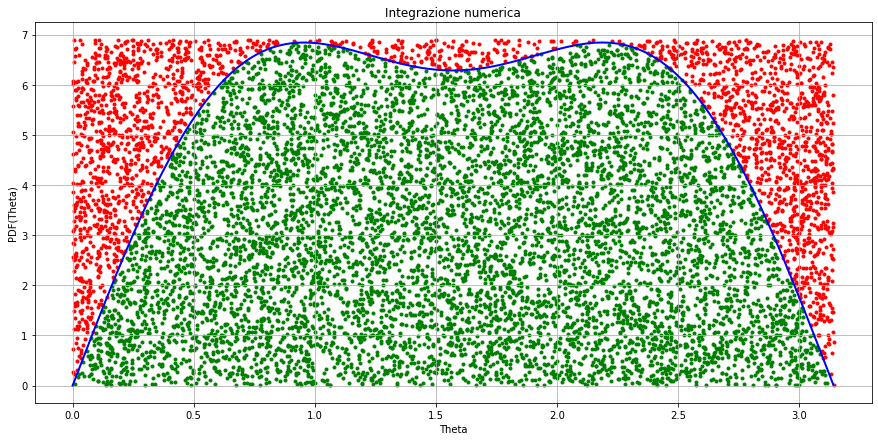

In [20]:
PUNTI=10000
a=0
b=np.pi
fmax=6.9
AREA=(b-a)*fmax
punti=0

P =[] # emissioni utili
xp=[] # ASCISSE CASUALI
yp=[] # ORDINATE CASUALI --- SOTTO IL GRAFICO
xP=[] # ASCISSE CASUALI
yP=[] # ORDINATE CASUALI --- SOPRA IL GRAFICO
 
for p in range(0,PUNTI):
  x = random.uniform(a,b)
  y = random.uniform(0,fmax)
  if y <= cross_section(x):
    punti=punti+1
    xp.append(x) # punto sotto
    yp.append(y)
    R = np.random.uniform(0,2*np.pi)
    if np.cos(R)>0 :
      if -1/4 < np.tan(R) and np.tan(R) < 1/4 :
        temp = []
        temp.append(R)
        if 1/2 < 1/(np.cos(R)*np.tan(x)) and 1/(np.cos(R)*np.tan(x)) < 1 :
          temp.append(x)
          P.append(temp)
  else:
    xP.append(x) # punto sopra
    yP.append(y)

area=(punti/PUNTI) * AREA
sigma= (AREA/PUNTI)*(punti - punti**2/PUNTI)**0.5
print("PUNTI=%d punti=%d area=%.3f +/- %.3f" %(PUNTI,punti,area,sigma))

E=np.arange(0.,np.pi,0.01)
G=np.vectorize(cross_section)
y=G(E)

figure(figsize=(15,7)) 
plt.grid()
plt.plot(E , y, color="blue" , linewidth="2") # Funzione
plt.scatter(xp, yp, color="green", marker ="."  ) # Sotto...
plt.scatter(xP, yP, color="red"  , marker ="."  ) # Sopra...
plt.xlabel('Theta')
plt.ylabel('PDF(Theta)')
plt.title("Integrazione numerica")
print(len(P))

In [21]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt

def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions, sizes, colors, **kwargs):
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s))
    return Poly3DCollection(np.concatenate(g), facecolors=np.repeat(colors,6), **kwargs)
    
def retta(phi,theta):
  r=3.5
  line=[]
  line.append(r*np.cos(phi)*np.sin(theta))
  line.append(r*np.sin(phi)*np.sin(theta))
  line.append(r*np.cos(theta))
  return line

def assorbimento(rho):
  return np.e**(-rho)


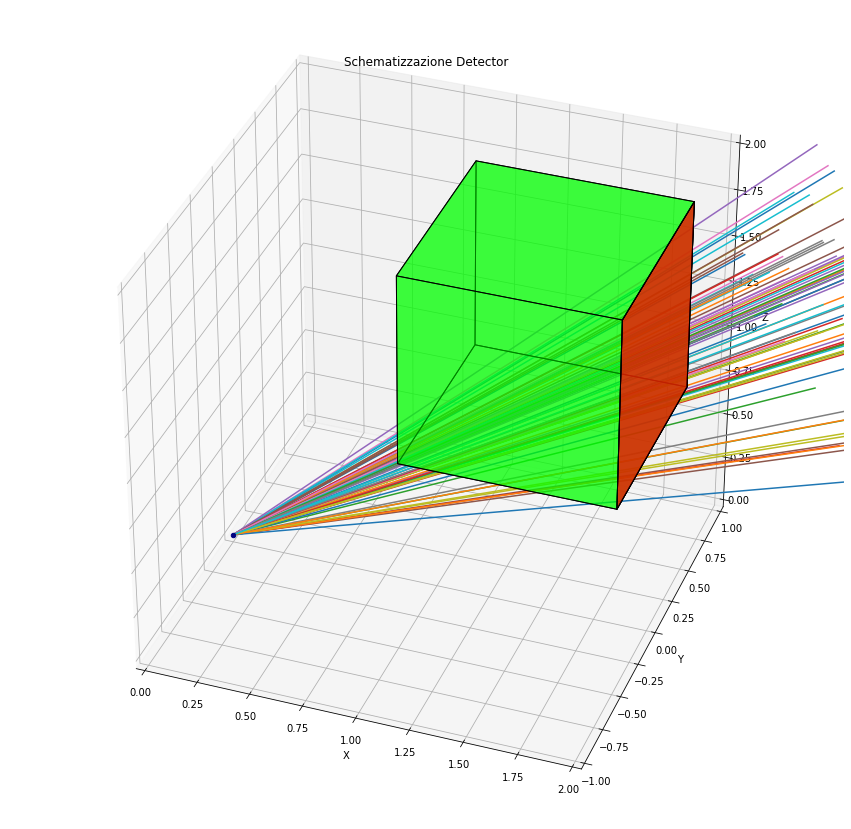

In [25]:
# costruzione cubo + rilevatore
positions = [(1,-1/2,1),(2,-1/2,1)]
sizes = [(1,1,1),(0,1,1)]
colors = ["lime","red"]

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
for i in range(0,len(P)):
  X=[0]
  Y=[0]
  Z=[0]
  X.append(retta(P[i][0],P[i][1])[0])
  Y.append(retta(P[i][0],P[i][1])[1])
  Z.append(retta(P[i][0],P[i][1])[2])
  ax.plot3D(X,Y,Z)

pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k", alpha=0.5)
ax.add_collection3d(pc) 
ax.scatter(0,0,0, color='navy')
ax.set_title('Schematizzazione Detector')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0,2])
ax.set_ylim([-1,1])
ax.set_zlim([0,2])
ax.view_init(35,-70)

## **Assorbimento**:

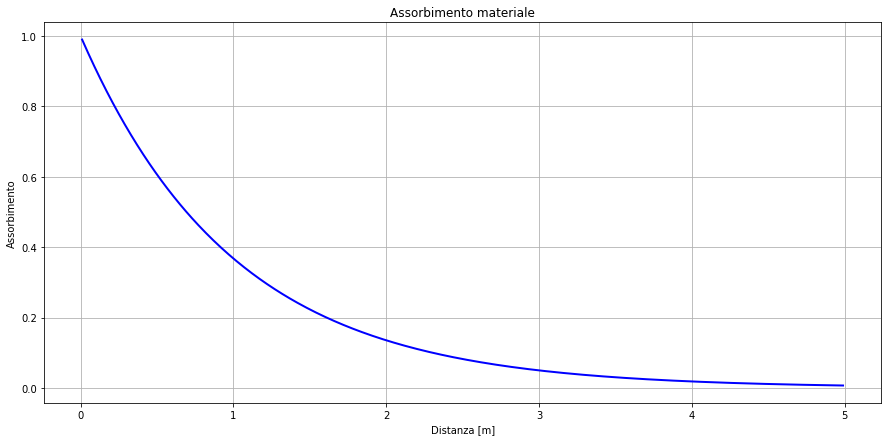

In [13]:
E=np.arange(0.01,5,0.01)
Abs=np.vectorize(assorbimento)
y=Abs(E)

figure(figsize=(15,7)) 
plt.grid()
plt.plot(E , y, color="blue" , linewidth="2")
plt.title('Assorbimento materiale')
plt.xlabel('Distanza [m]')
plt.ylabel('Assorbimento')
plt.grid(True)

In [26]:
# distanza origine rilevatore per perticella:
distance=[]
for i in range(0,len(P)):
  dis_tot = 2/(np.cos(P[i][0])*np.sin(P[i][1]))
  dis_out = 1/(np.cos(P[i][0])*np.sin(P[i][1]))
  high = dis_out * np.cos(P[i][1])
  if high >= 1:
    distance.append(dis_tot - dis_out)
  else:
    dis_out_z = 1/np.cos(P[i][1])
    distance.append(dis_tot-dis_out_z)
# Assorbimento  percentuale materiale:
Abs=[]
k=0
for i in range(0,len(P)):
  Abs.append(1-assorbimento(distance[i]))
  if Abs[i] >= 1:
    ++k
print('Il numero di particelle assorbite è: %i'%k)
print('L assorbimento medio del materiale è: %.2f (per cento) '%(sum(Abs)*100 / len(Abs)))

Il numero di particelle assorbite è: 0
L assorbimento medio del materiale è: 47.96 (per cento) 


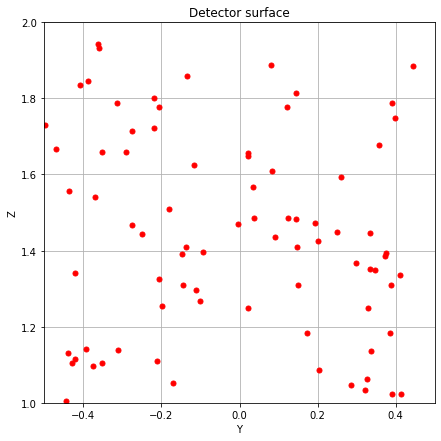

In [27]:
# Hit delle particelle

hit_y = []
hit_z = []
for i in range(0,len(P)):
  r = 2/(np.cos(P[i][0])*np.sin(P[i][1]))
  y = r*np.sin(P[i][0])*np.sin(P[i][1])
  hit_y.append(y)
  z = r*np.cos(P[i][1])
  hit_z.append(z)
figure(figsize=(7,7))
plt.plot(hit_y,hit_z,'r.', markersize=10)
plt.title('Detector surface')
plt.xlabel('Y')
plt.ylabel('Z')
plt.xlim(-1/2,1/2)
plt.ylim(1,2)
plt.grid()

## **Accettanza**:

In [34]:
A=len(P)/PUNTI
print('L ACCETTANZA è: %.3f (per cento)' %(A*100))

L ACCETTANZA è: 0.750 (per cento)
